<a href="https://colab.research.google.com/github/RusnaAida24/NFLX-prediction-Prophet/blob/main/NetflixStockPrediction_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**NETFLIX (NFLX) Stock Prediction using Prophet**



In [1]:
## Switch to GPU mode for faster Computation (Runtime> Change runtime> GPU)

## Importing all the necessary Libraries

In [2]:
#Necessary libraries = Pandas, fbprophet and plotly

#pandas= data Manipulation and analysis
#fbprophet = Forecasting
#plotly= data visualization

In [3]:
import io, os, sys, setuptools, tokenize

In [4]:
!pip install prophet
from prophet import Prophet

In [5]:
import pandas as pd
import plotly.express as px

In [6]:
#Initializing Plotly
import plotly.io as pio
pio.renderers.default='colab'

## Importing the Dataset & Exploring it

In [7]:
# read_csv function from pandas
# url = 'https://drive.google.com/uc?id={}'.format(file_id)
# file_id = 1Fm-Vt6HIGCT1f17YZ6olGkRlGLfa6i47
# get file_id from shareable link of file (upload the file to google drive)

url = 'https://drive.google.com/uc?id={}'.format('1Fm-Vt6HIGCT1f17YZ6olGkRlGLfa6i47')
df=pd.read_csv(url)
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-06-10,182.639999,185.860001,180.850006,182.940002,182.940002,13065600
1,2022-06-13,177.070007,179.089996,168.960007,169.690002,169.690002,10222400
2,2022-06-14,169.750000,172.059998,164.279999,167.539993,167.539993,11555300
3,2022-06-15,169.259995,183.850006,168.529999,180.110001,180.110001,12396000
4,2022-06-16,174.000000,176.270004,171.559998,173.350006,173.350006,8201300


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [9]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,284.976693,290.725179,280.161674,285.733546,285.733546,9.281248e+06
std,60.009002,60.240438,59.670762,59.952251,59.952251,5.927140e+06
min,169.259995,172.059998,164.279999,167.539993,167.539993,2.657900e+06
25%,231.419998,237.139999,226.895004,233.000000,233.000000,5.797450e+06
50%,296.170013,299.820007,289.000000,294.959991,294.959991,7.543300e+06
75%,330.085007,333.135010,324.205002,330.029999,330.029999,1.079100e+07
max,424.500000,425.899994,414.760010,420.019989,420.019989,5.392030e+07


# Data Visualization using plotly express- Visualizing the historical performance of Netflix


In [10]:
#Line graph, Area graph , box plot (Analyzing price and volume)

In [11]:
# We choose Close Price because it has the most accurate representation
px.area(df,x="Date",y="Close")

In [12]:
# same as above except that now we want to see a line graph instead of the area
px.line(df,x="Date",y="Close")

In [13]:
# y=Volume
# Volume represents for the daily transactional volume of Netflix or
# number of shares traded between its daily open and close
px.area(df,x="Date",y="Volume")

===================================================================================================================<br>
Average transactional volume of Netflix daily is between 10Million to 50Million. We can also analyze on what happen to Netflix when it's **transactional volume become so high on 20 July 2022 (Volume=53.9203M)**

Here is the news on Netflix on that date: https://www.opb.org/article/2022/07/20/netflix-loses-nearly-1-million-subscribers-that-s-the-good-news/ <br><br>
**Summary from the news:** <br>
Netflix predicted the company will lose 2million subscribers and fortunately the prediction is wrong-only lose 900k subscribes (a big number but still less than 2Million.<br>
Netflix cooperated with Microsoft to give a low price subscription in the future.<br>
Netflix planned to explore the method which it thinks will result in around 100 million homes having free access to the service.


===================================================================================================================<br>
**Lowest transactional volume** is on **10 April 2023 (Volume=2.6579M)**<br>
Related news: https://economictimes.indiatimes.com/news/international/business/netflix-puts-an-end-to-password-sharing-for-subscribers-in-us/articleshow/100575196.cms <br><br>

**Summary from the news:**<br>
Increased competition from other streaming services (Disney+, Warner Bros, etc).<br>
Netflix removed password sharing for US subscribers.<br>
===================================================================================================================<br>



In [14]:
# can use px without value of x. Below is the bar graph
px.bar(df, y='Volume')

In [15]:
# analyze Close Price
# get statistical data--> mean, median, quartiles, maximum, minimum
px.box(df, y='Close')

===================================================================================================================<br>
**Understand the box plot**<br>
1) Bottom horizontal line of box plot is minimum value -min: 167.54 <br>
2) First horizontal line of rectangle shape of box plot is First quartile or 25% -q1: 232.755<br>
3) Second horizontal line of rectangle shape of box plot is Second quartile or 50% or median. -median: 294.96<br>
4) Third horizontal line of rectangle shape of box plot is third quartile or 75% -q3: 330.08<br>
5) Top horizontal line of rectangle shape of box plot is maximum value -max:420.02
<br>===================================================================================================================<br>


# Understanding Facebook Prophet

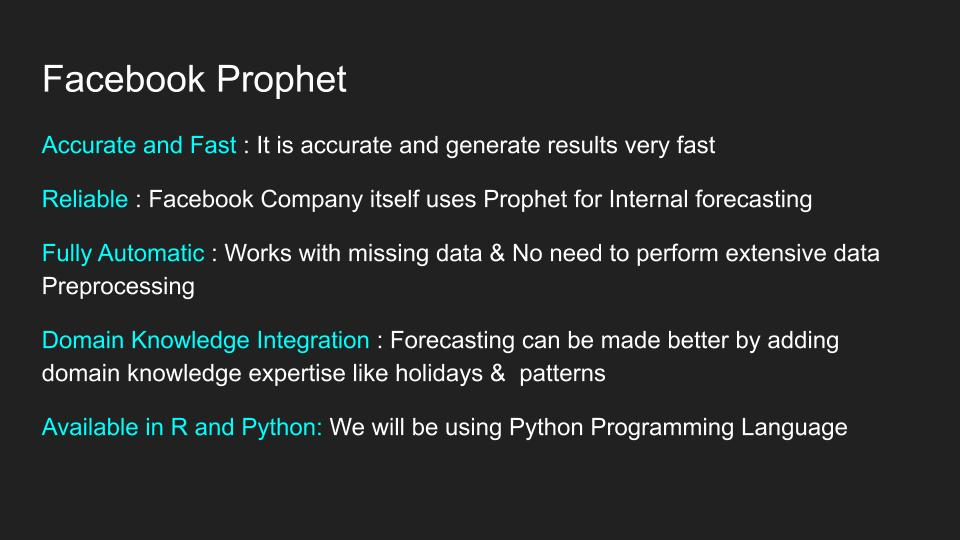

## Data Preperation

In [16]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-06-10,182.639999,185.860001,180.850006,182.940002,182.940002,13065600
1,2022-06-13,177.070007,179.089996,168.960007,169.690002,169.690002,10222400
2,2022-06-14,169.750000,172.059998,164.279999,167.539993,167.539993,11555300
3,2022-06-15,169.259995,183.850006,168.529999,180.110001,180.110001,12396000
4,2022-06-16,174.000000,176.270004,171.559998,173.350006,173.350006,8201300
...,...,...,...,...,...,...,...
246,2023-06-05,400.470001,413.859985,400.149994,403.540009,403.540009,7247400
247,2023-06-06,405.000000,405.119995,396.929993,399.290009,399.290009,4991500
248,2023-06-07,410.429993,418.950012,399.230011,399.769989,399.769989,11932400
249,2023-06-08,399.769989,409.540009,396.339996,409.369995,409.369995,5991100


**Based on Investopedia-Stock Market Terms**<br>
=A bar chart visually depicts the open, high, low, and close prices of an asset or security over a specified period of time.<br>
=The vertical line on a price bar represents the high and low prices for the period.<br>
=The left and right horizontal lines on each price bar represent the open and closing prices.<br>
=Bar charts can be colored coded where if the close is above the open it may be colored black or green, and if the close is below the open the bar may be colored red.<br>

In [17]:
%%html
<iframe src="https://drive.google.com/file/d/1ykaO-jPp18MeGIeO_ipf2x_H8866lbiX/preview" width="650" height="350" allow="autoplay"></iframe>

Picture above shows the trades prices on daily basis, source: Yahoo Finance <br><br>
Prophet only needs two columns which are **ds for date and y for price**. In our case, the price is from column named Close.

In [18]:
  columns=['Date','Close']
  ndf=pd.DataFrame(df,columns=columns)

In [19]:
ndf

,Date,Close
0,2022-06-10,182.940002
1,2022-06-13,169.690002
2,2022-06-14,167.539993
3,2022-06-15,180.110001
4,2022-06-16,173.350006
...,...,...
246,2023-06-05,403.540009
247,2023-06-06,399.290009
248,2023-06-07,399.769989
249,2023-06-08,409.369995


In [20]:
# Change the columns name so that Prophet can understand
prophet_df=ndf.rename(columns={'Date':'ds', 'Close':'y'})
prophet_df

,ds,y
0,2022-06-10,182.940002
1,2022-06-13,169.690002
2,2022-06-14,167.539993
3,2022-06-15,180.110001
4,2022-06-16,173.350006
...,...,...
246,2023-06-05,403.540009
247,2023-06-06,399.290009
248,2023-06-07,399.769989
249,2023-06-08,409.369995


## Creating Facebook Prophet Model

In [21]:
m=Prophet()
m.fit(prophet_df) #fitted the data into model

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcnyhf5q0/2jcvfkr_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcnyhf5q0/a0zo51fb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64848', 'data', 'file=/tmp/tmpcnyhf5q0/2jcvfkr_.json', 'init=/tmp/tmpcnyhf5q0/a0zo51fb.json', 'output', 'file=/tmp/tmpcnyhf5q0/prophet_modelmnssnz5q/prophet_model-20230629145125.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:51:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:51:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


##Forecasting

We are going to forecast the price of Netflix
30 days into the future.Create a dataframe "Future" with "m" represents Prophet.

In [22]:
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)

In [23]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-06-10,175.620018,150.919165,200.064140,175.620018,175.620018,0.496611,0.496611,0.496611,0.496611,0.496611,0.496611,0.0,0.0,0.0,176.116629
1,2022-06-13,177.689213,152.187567,200.636102,177.689213,177.689213,-1.939909,-1.939909,-1.939909,-1.939909,-1.939909,-1.939909,0.0,0.0,0.0,175.749304
2,2022-06-14,178.378945,147.810293,198.940625,178.378945,178.378945,-4.249491,-4.249491,-4.249491,-4.249491,-4.249491,-4.249491,0.0,0.0,0.0,174.129453
3,2022-06-15,179.068676,152.175165,203.426376,179.068676,179.068676,-1.380050,-1.380050,-1.380050,-1.380050,-1.380050,-1.380050,0.0,0.0,0.0,177.688627
4,2022-06-16,179.758408,153.900634,204.448077,179.758408,179.758408,0.049580,0.049580,0.049580,0.049580,0.049580,0.049580,0.0,0.0,0.0,179.807988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,2023-07-05,386.492863,362.123311,408.868180,384.964272,388.021335,-1.380050,-1.380050,-1.380050,-1.380050,-1.380050,-1.380050,0.0,0.0,0.0,385.112813
277,2023-07-06,387.052230,361.962260,411.141290,385.467438,388.678822,0.049580,0.049580,0.049580,0.049580,0.049580,0.049580,0.0,0.0,0.0,387.101810
278,2023-07-07,387.611597,364.135421,411.205278,385.938337,389.329253,0.496611,0.496611,0.496611,0.496611,0.496611,0.496611,0.0,0.0,0.0,388.108208
279,2023-07-08,388.170964,366.639506,416.212152,386.379734,389.972242,3.511629,3.511629,3.511629,3.511629,3.511629,3.511629,0.0,0.0,0.0,391.682593


From the forecast datarame, the most important value is **yhat column-our predicted value**

In [24]:
# Plot the forecast dataframe
px.line(forecast,x='ds',y='yhat')

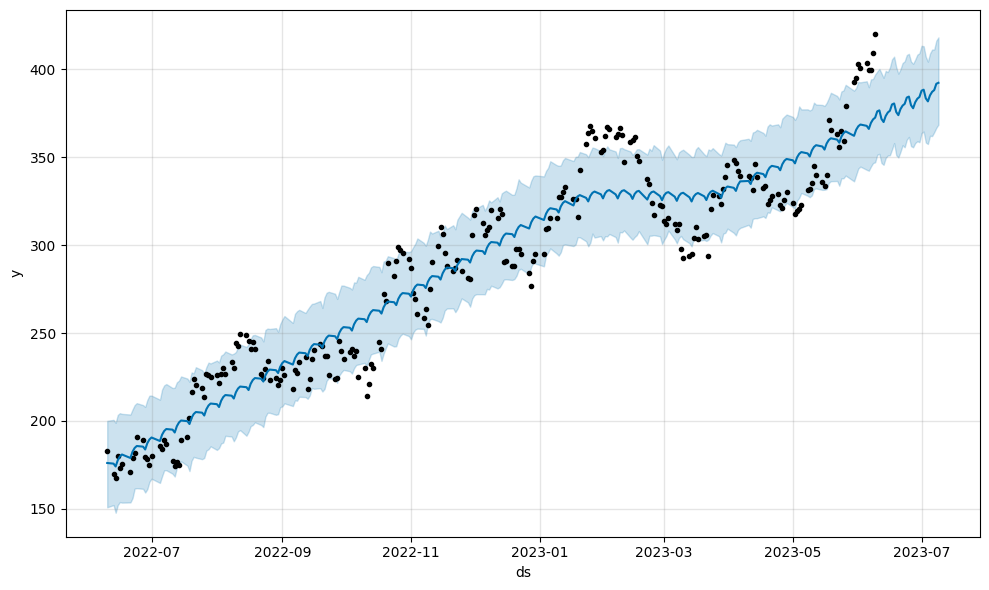

In [25]:
figure = m.plot(forecast,xlabel='ds',ylabel='y')

**Black dots** represent the actual price of Netflix.<br>
**Blue line** represent forecasted price.<br>
The **shaded region** is between y_hat lower and y_hat upper

Currently, the black dots is higher that y_hat upper and the forecasted price. It is a bad buying opportunity and good selling opportunity since the price will going down.

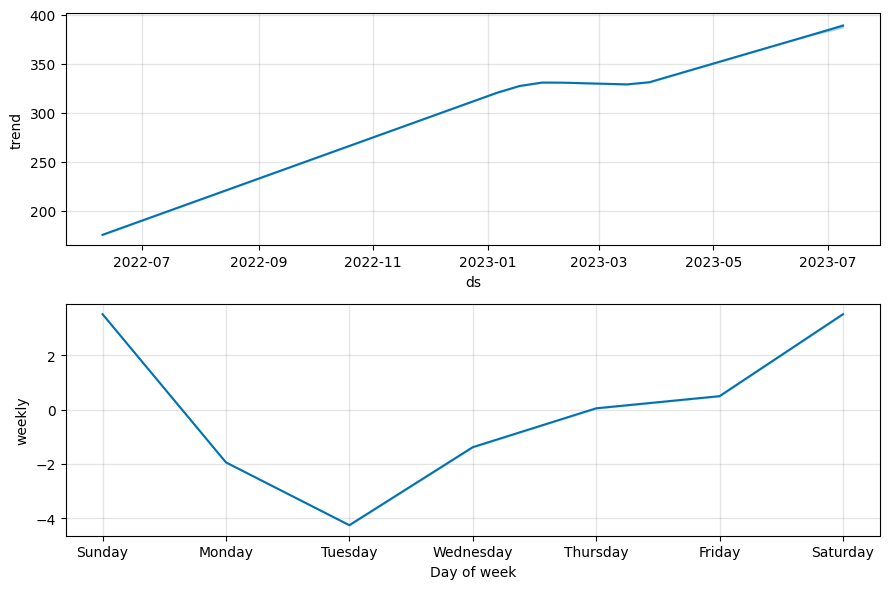

In [26]:
# Visualize the trend
figure2=m.plot_components(forecast)

##Downloading the Forecast data

In [27]:
from google.colab import files
forecast.to_csv('nflx_forecast.csv')
files.download('nflx_forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>